# Imports


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pipbytes/datasets/refs/heads/main/Classification/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df['target'].unique()

array([1, 0])

# Exploratory Data Analysis and Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization

#### Count plot

<Axes: xlabel='target', ylabel='count'>

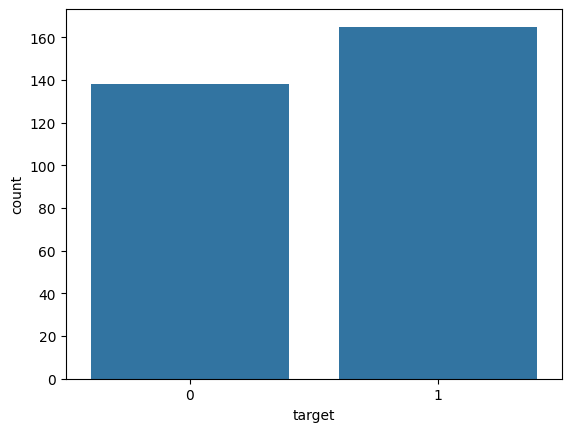

In [ ]:
sns.countplot(x='target', data=df)

#### Pair plot

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

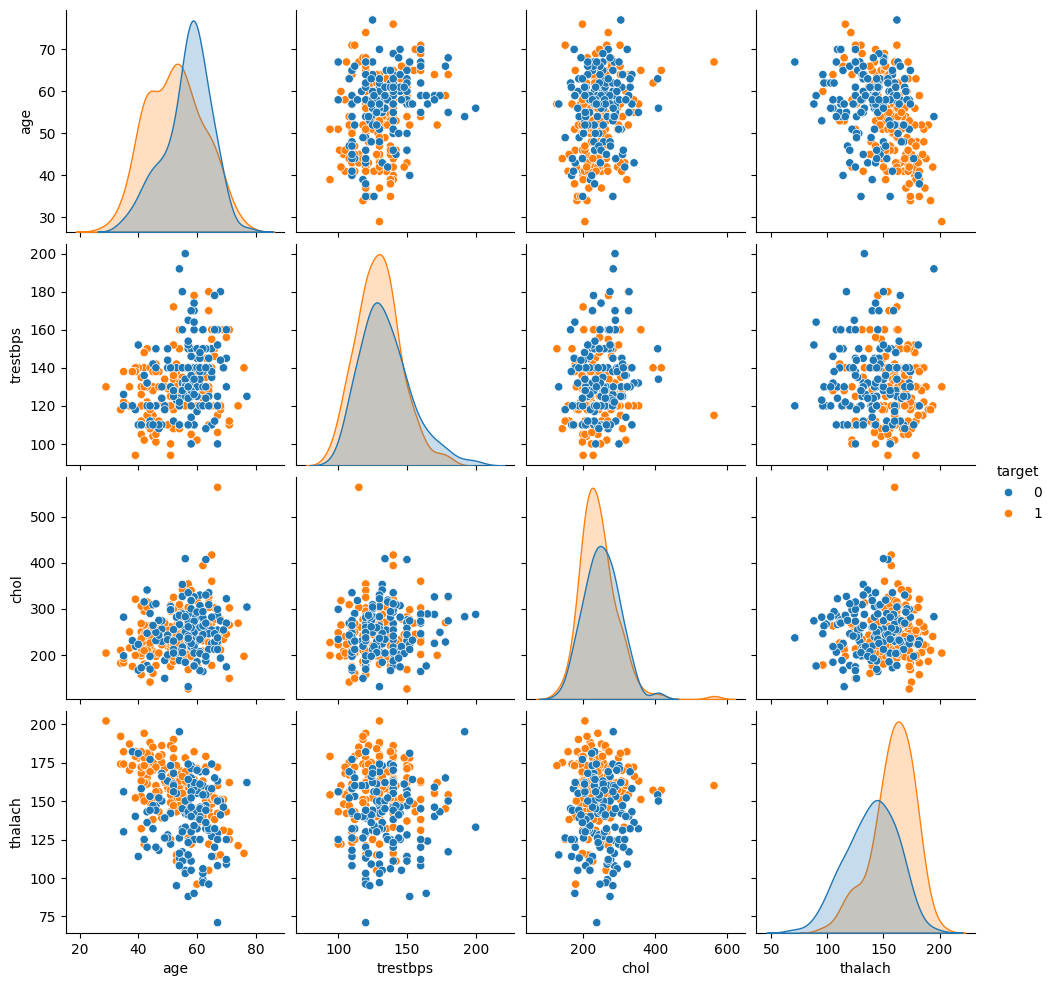

In [ ]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']], hue='target')


#### Heatmap

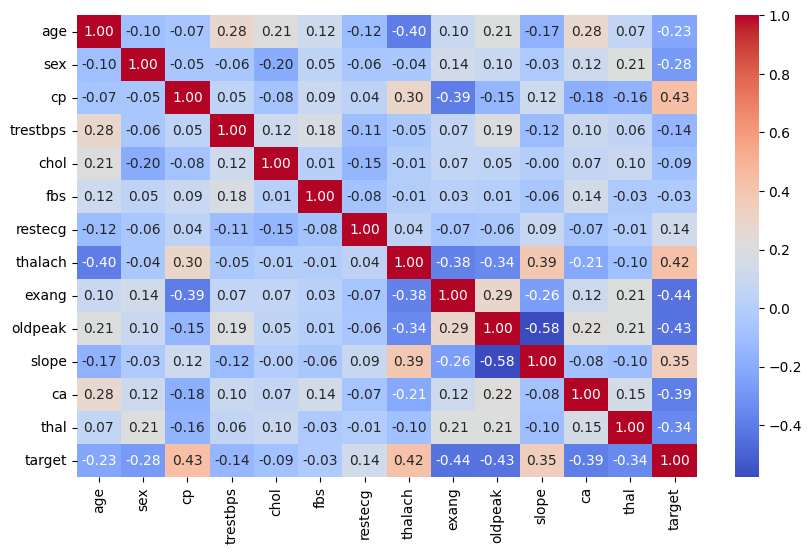

In [ ]:
corr = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Train | Test Split and Scaling


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV()
log_reg.fit(X_train_scaled, y_train)

LogisticRegressionCV()

## Log optimal parameters


In [ ]:
log_reg.C_

array([0.04641589])

In [ ]:
log_reg.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

## Coeffecients



In [ ]:
coef = pd.Series(log_reg.coef_[0], index=X.columns)
coef = coef.sort_values()

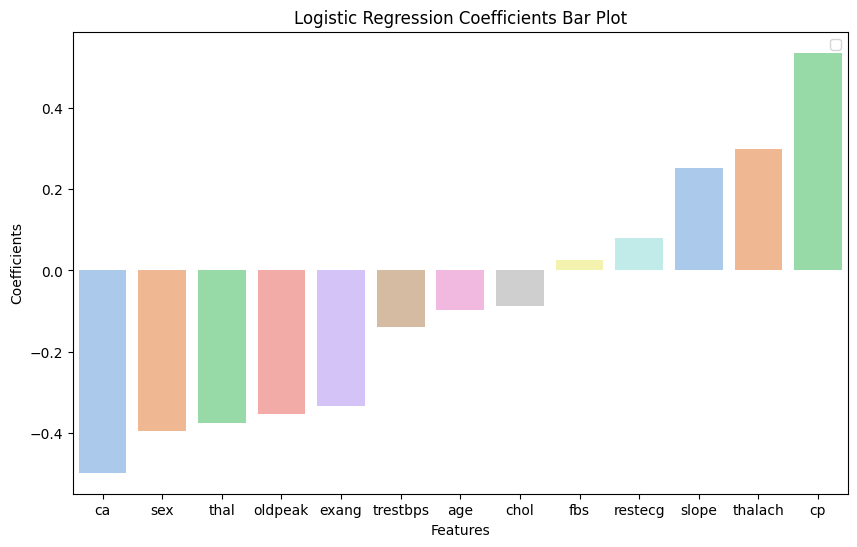

In [ ]:
# Define color palette
palette = sns.color_palette('pastel', n_colors=len(coef))  # Choose a theme and set the number of colors

# Plot with color theme
plt.figure(figsize=(10, 6))
sns.barplot(y=coef, x=coef.index, palette=palette, hue=coef)
plt.title('Logistic Regression Coefficients Bar Plot')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.legend([],[]) # hide legend
plt.show()


---------

## Model Performance Evaluation

#### Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')

Accuracy: 0.8387096774193549



#### Classification Report

In [ ]:
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



#### Confusion Matrix

In [ ]:
print(f'Confusion Matrix:\n{cm}\n')

Confusion Matrix:
[[12  3]
 [ 2 14]]



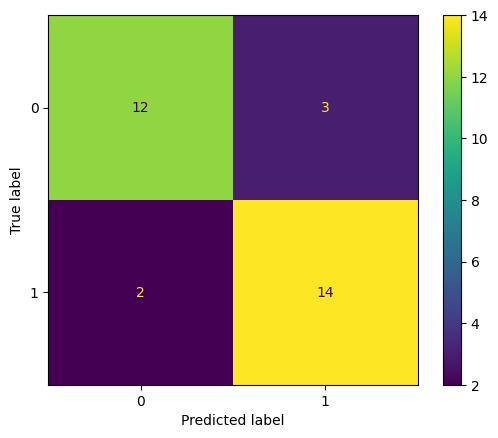

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### Precision Recall Curve

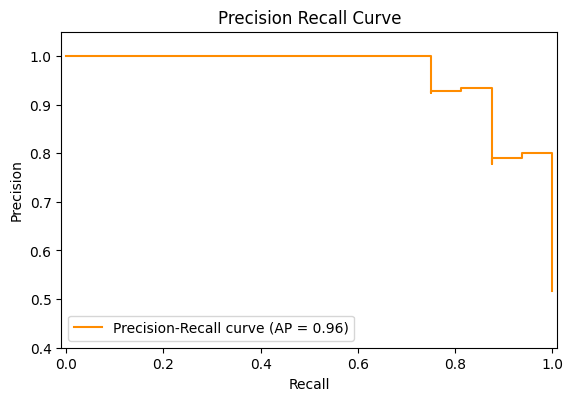

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Generate predicted probabilities
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

# Calculate the Average Precision (AP) for the legend
average_precision = auc(recall, precision)

# Create the Precision-Recall display
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot(color="darkorange")

# Customize the plot
pr_display.ax_.set_title('Precision Recall Curve')
pr_display.ax_.set_xlabel('Recall')
pr_display.ax_.set_ylabel('Precision')
pr_display.ax_.set_ylim([0.4, 1.05])

# Add a custom legend with Average Precision
plt.legend([f'Precision-Recall curve (AP = {average_precision:.2f})'], loc='lower left')

# Display the plot
plt.show()

#### ROC Curve

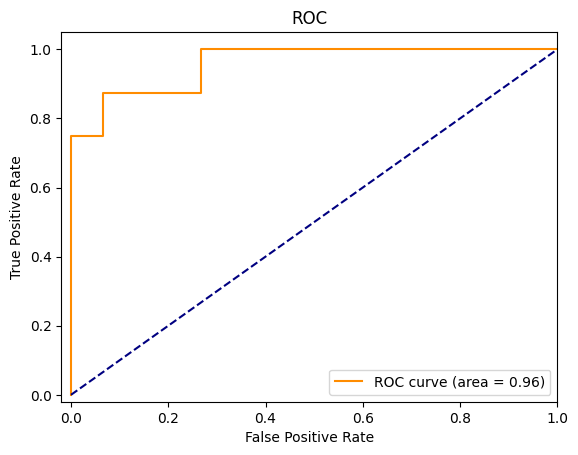

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC Curve plot
plt.figure()

plt.plot(fpr, tpr,
         color="darkorange",
         label=f"ROC curve (area = {roc_auc:.2f})")

# Add the diagonal line
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")

# Adjust limits to create space at (0,0)
plt.xlim([-0.02, 1.0])  # Start x-axis slightly before 0
plt.ylim([-0.02, 1.05])  # Start y-axis slightly before 0

# Set labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()


**A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [ ]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [ ]:
log_reg.predict(patient)

array([0])

In [ ]:
log_reg.predict_proba(patient)

array([[9.99999860e-01, 1.39946031e-07]])